# 24FS\_I4DS27: Adversarial Attacks - Wie kann KI überlistet werden? <br> 00-Training

## Setup

In [1]:
%load_ext autoreload
%autoreload 2

import os
import torchvision
os.chdir("../")

from src.data.mri import MRIDataModule
from src.data.covidx import COVIDXDataModule
from src.utils.eda import ExplorativeDataAnalysis

## Fixed Parameters

In [2]:
BATCH_SIZE = 4
IMAGE_SIZE = (224, 224)

transform = torchvision.transforms.Compose(
    [
        torchvision.transforms.Resize((224, 224), antialias=True),
    ]
)

## Datenpartitionierung

In [3]:
MRIdata = MRIDataModule(
    path="data/raw/Brain-Tumor-MRI",
    path_processed="data/processed/Brain-Tumor-MRI",
    transform=transform,
    batch_size=BATCH_SIZE,
    train_shuffle=True,
).setup()

COVIDXdata = COVIDXDataModule(
    path="data/raw/COVIDX-CXR4",
    transform=transform,
    batch_size=BATCH_SIZE,
    train_shuffle=True,
).setup()

COVIDX_eda = ExplorativeDataAnalysis(COVIDXDataModule, 
                                     image_size=IMAGE_SIZE, 
                                     batchsize=BATCH_SIZE,
                                     seed=18,
                                     dataset="covidx_data",
                                     train_sample_size=0.001)

MRI_eda = ExplorativeDataAnalysis(MRIDataModule, 
                                  image_size=IMAGE_SIZE, 
                                  batchsize=BATCH_SIZE,
                                  dataset="mri_data")

In [4]:
display(MRIdata.get_partition_info())
display(COVIDXdata.get_partition_info())

,Dataset,Partitiontype,n image absolute,n image relative,n Positive class,n Negative class,Positive Ratio,n pituitary,n glioma,n meningioma,n no_tumor
0,MRI-Brain-Tumor,Train,2298,0.704044,1981,317,0.862054,662,661,658,317
1,MRI-Brain-Tumor,Validation,572,0.175245,494,78,0.863636,165,165,164,78
2,MRI-Brain-Tumor,Test,394,0.120711,289,105,0.733503,74,100,115,105


,Dataset,Partitiontype,n image absolute,n image relative,n Positive class,n Negative class,Postive Ratio
0,COVIDX-CXR4,Train,67863,0.800101,57199,10664,0.842860
1,COVIDX-CXR4,Validation,8473,0.099896,4241,4232,0.500531
2,COVIDX-CXR4,Test,8482,0.100002,4241,4241,0.500000


## Images

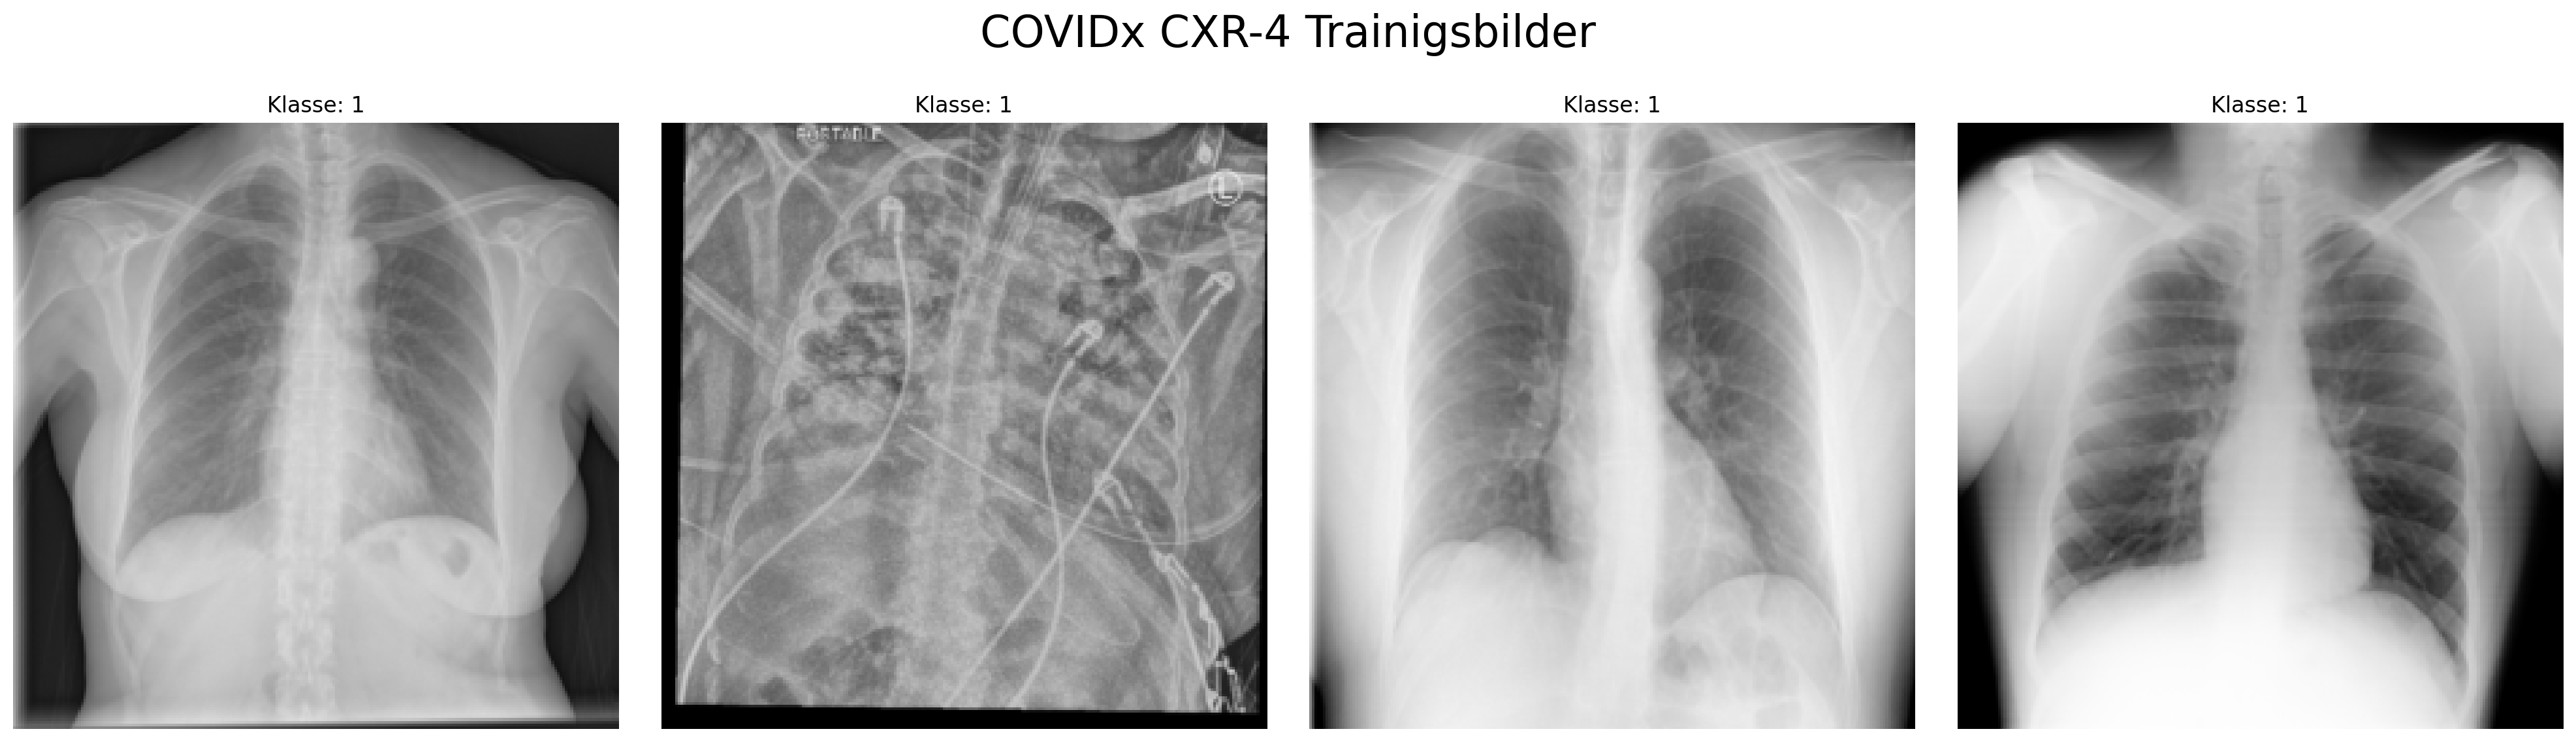

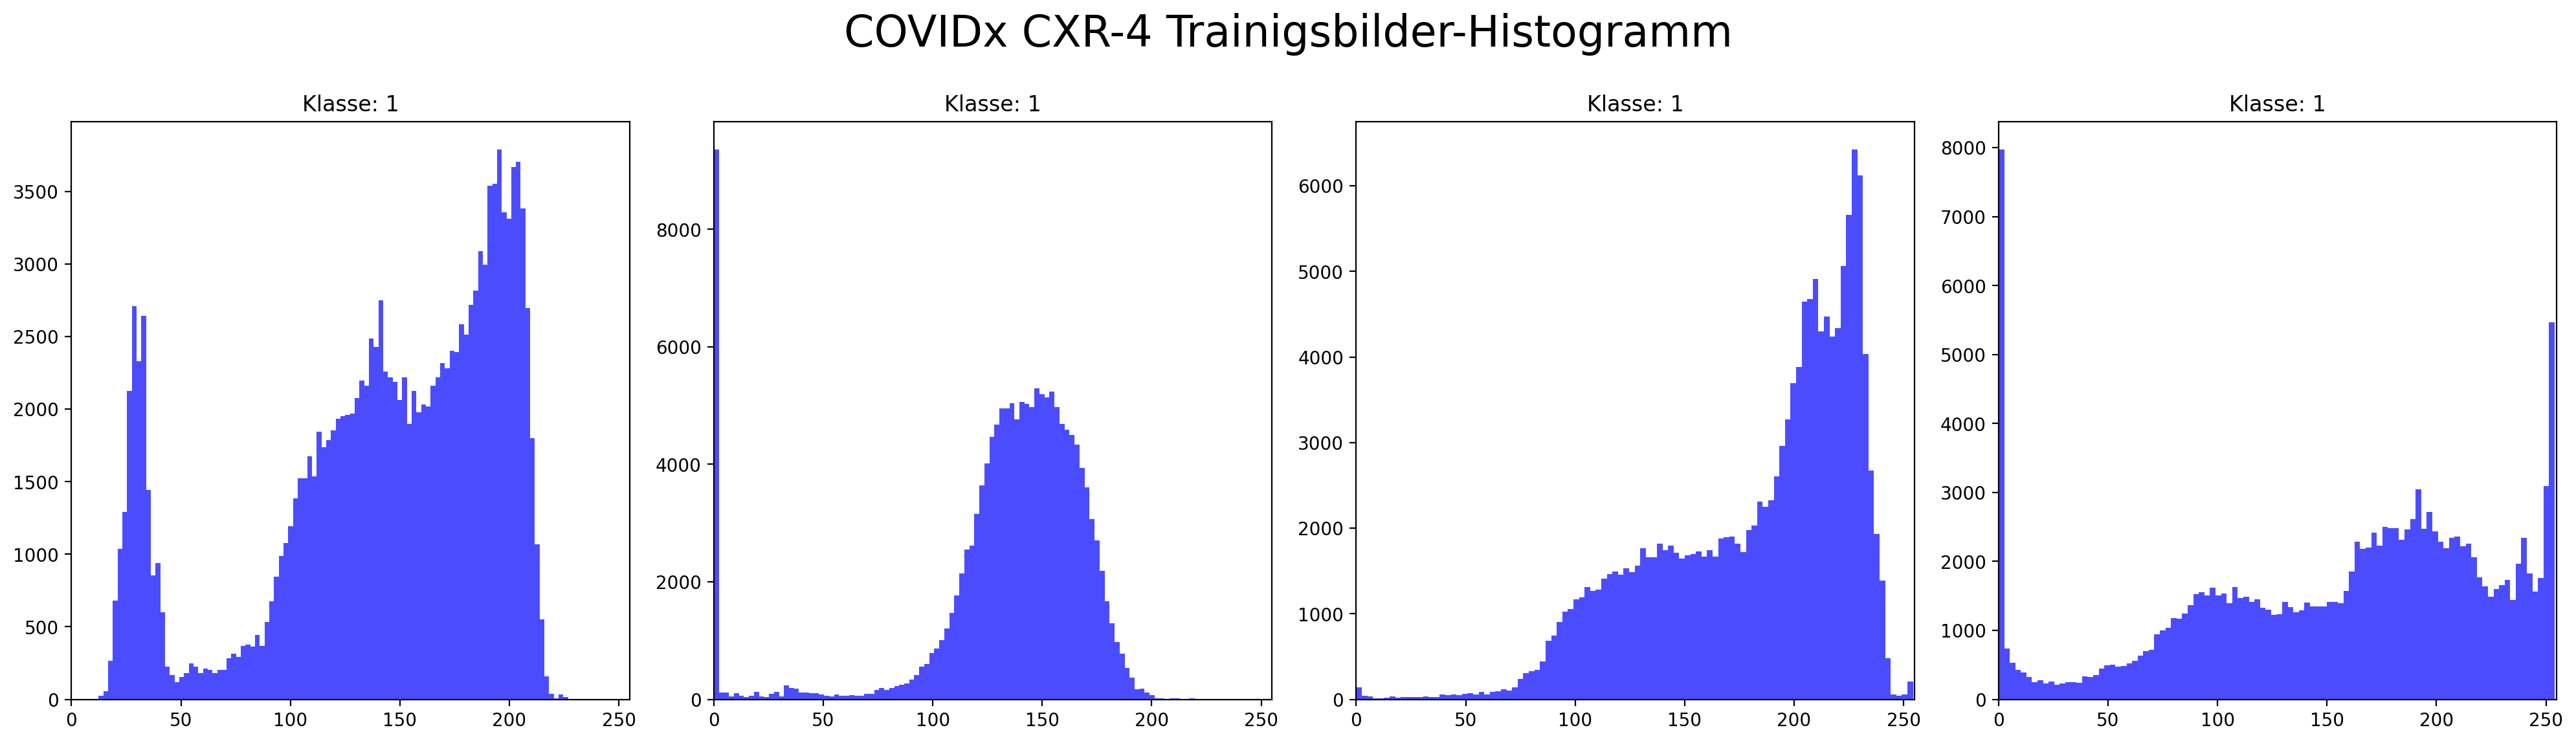

In [5]:
COVIDX_eda.show_batches(suptitle="COVIDx CXR-4 Trainigsbilder", 
                        batch_idx=[0, 75],
                        hist_mode=True,
                        dataloader_type="train")


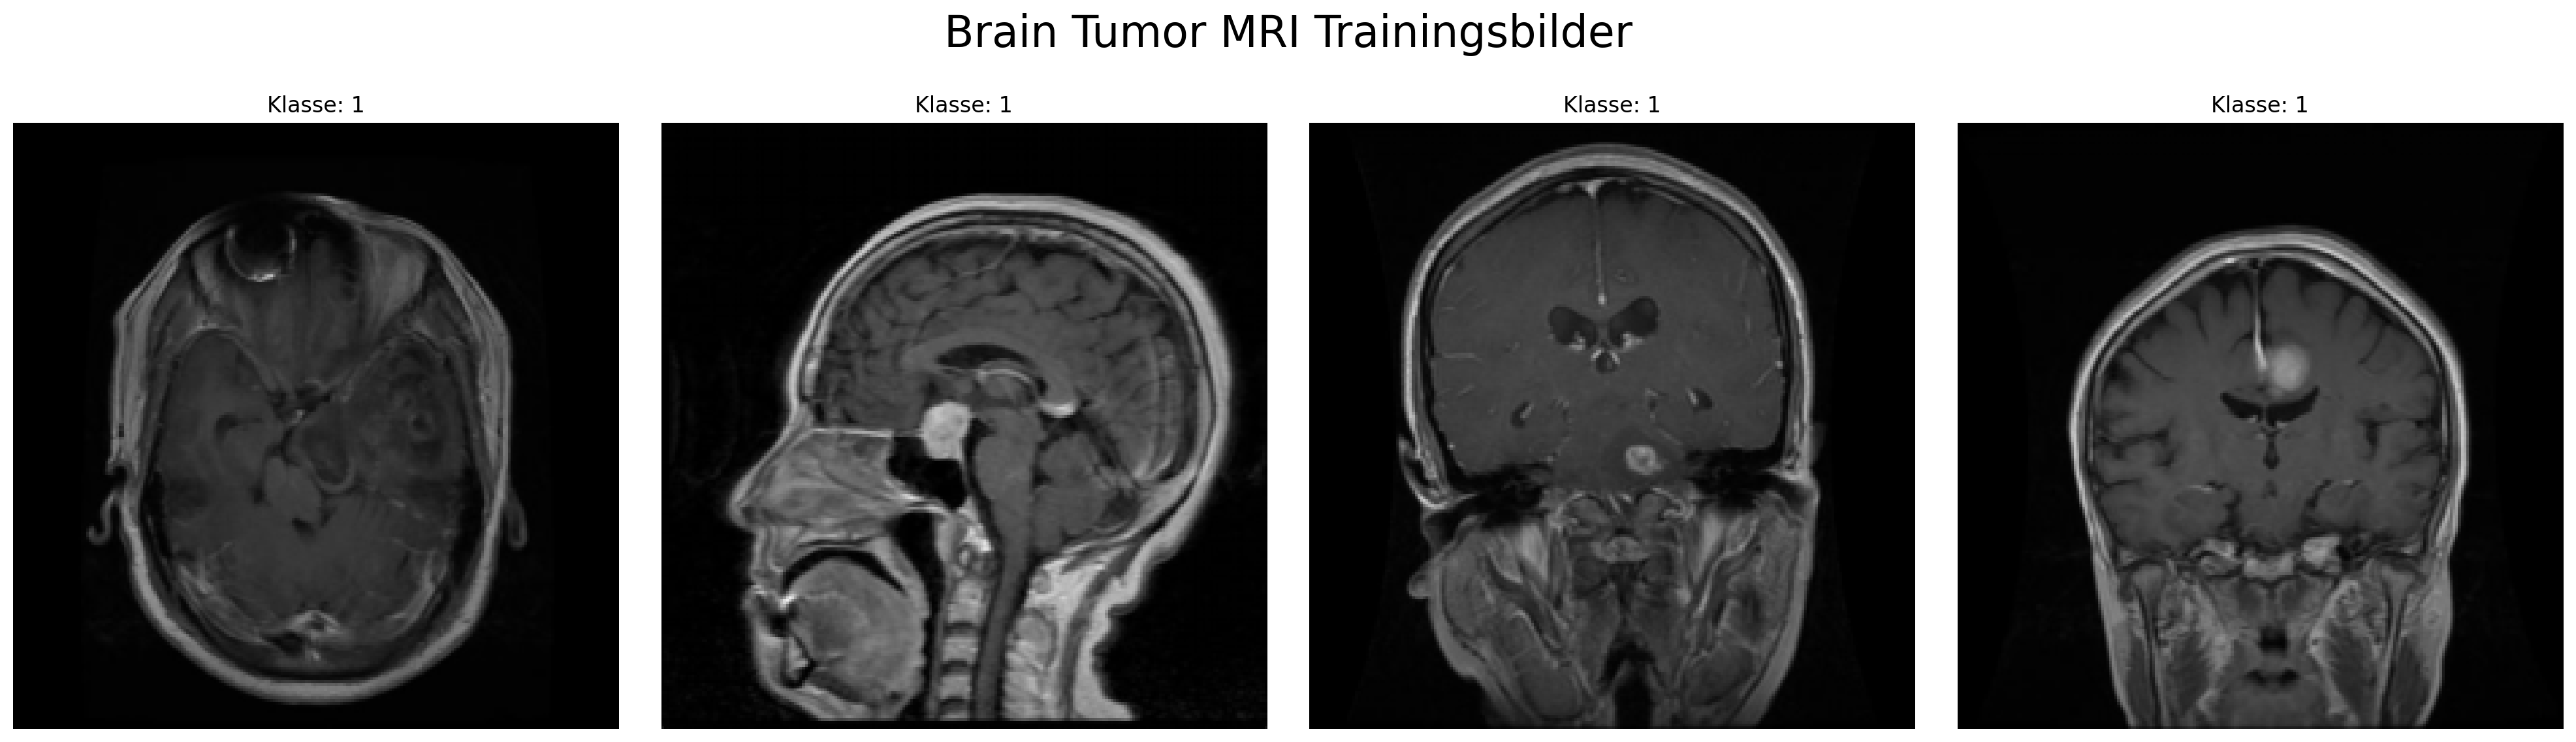

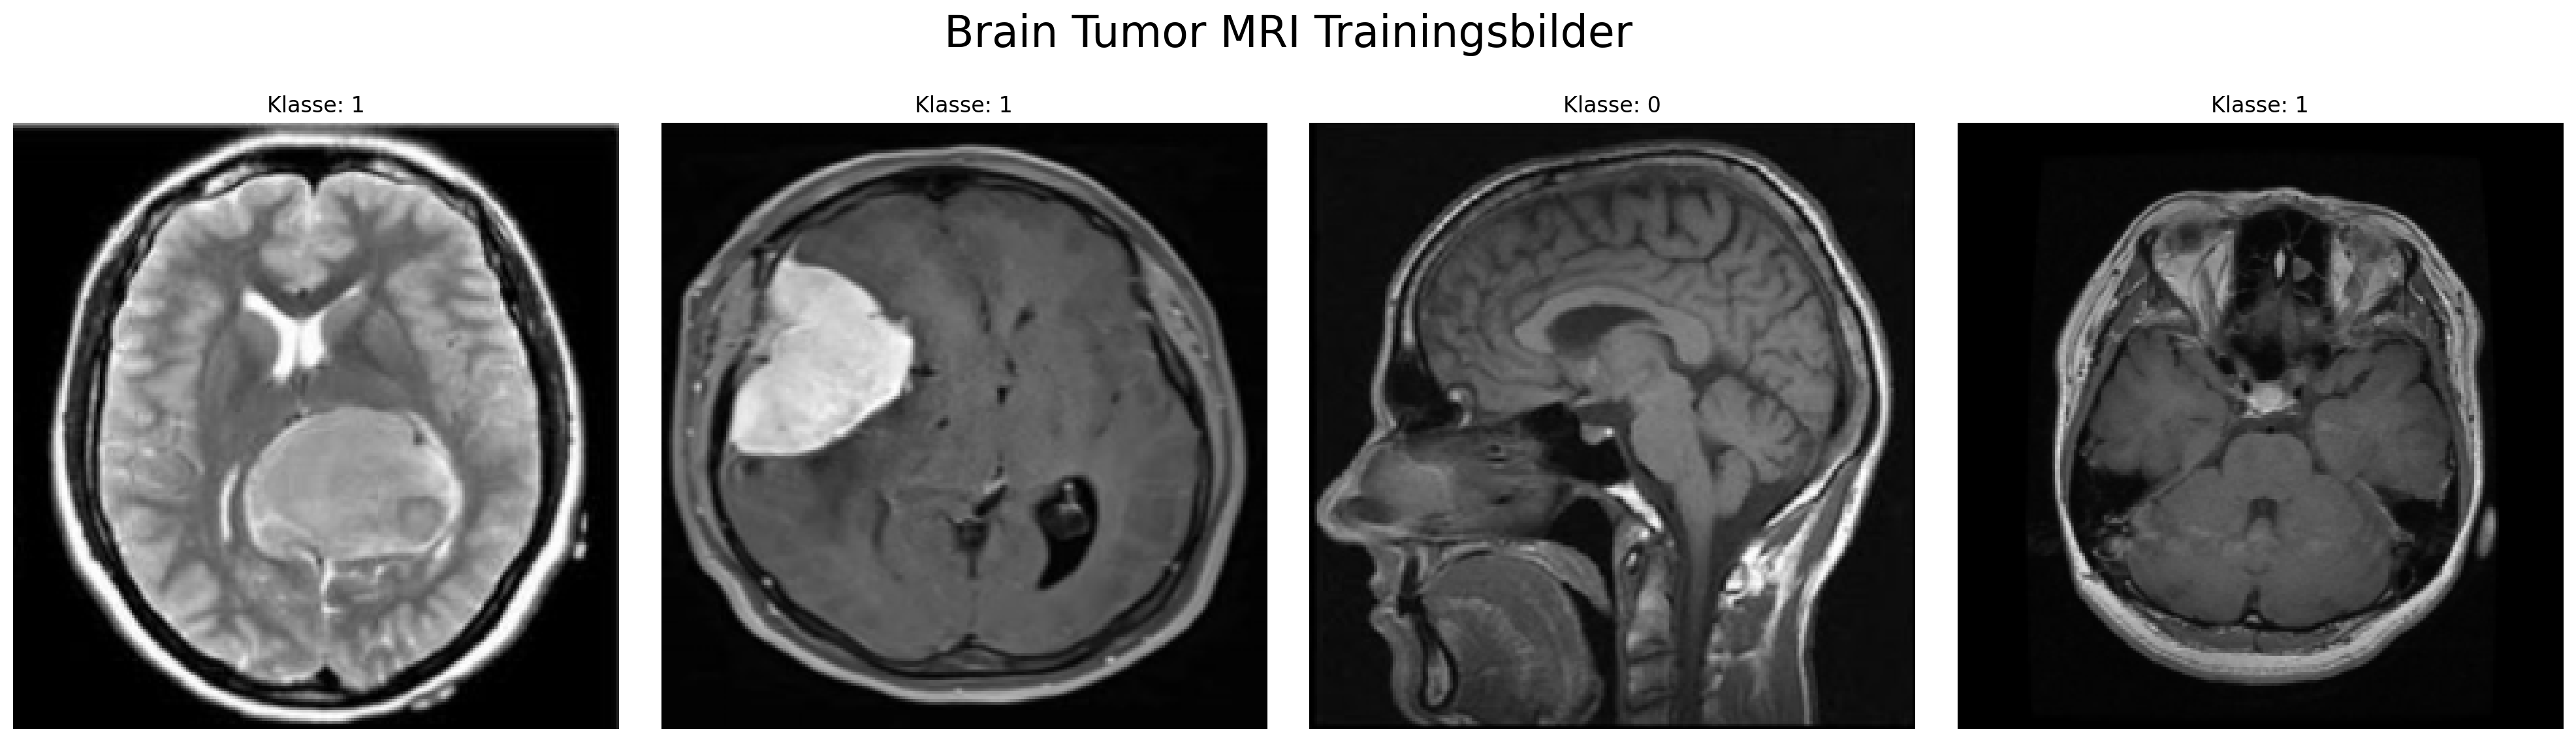

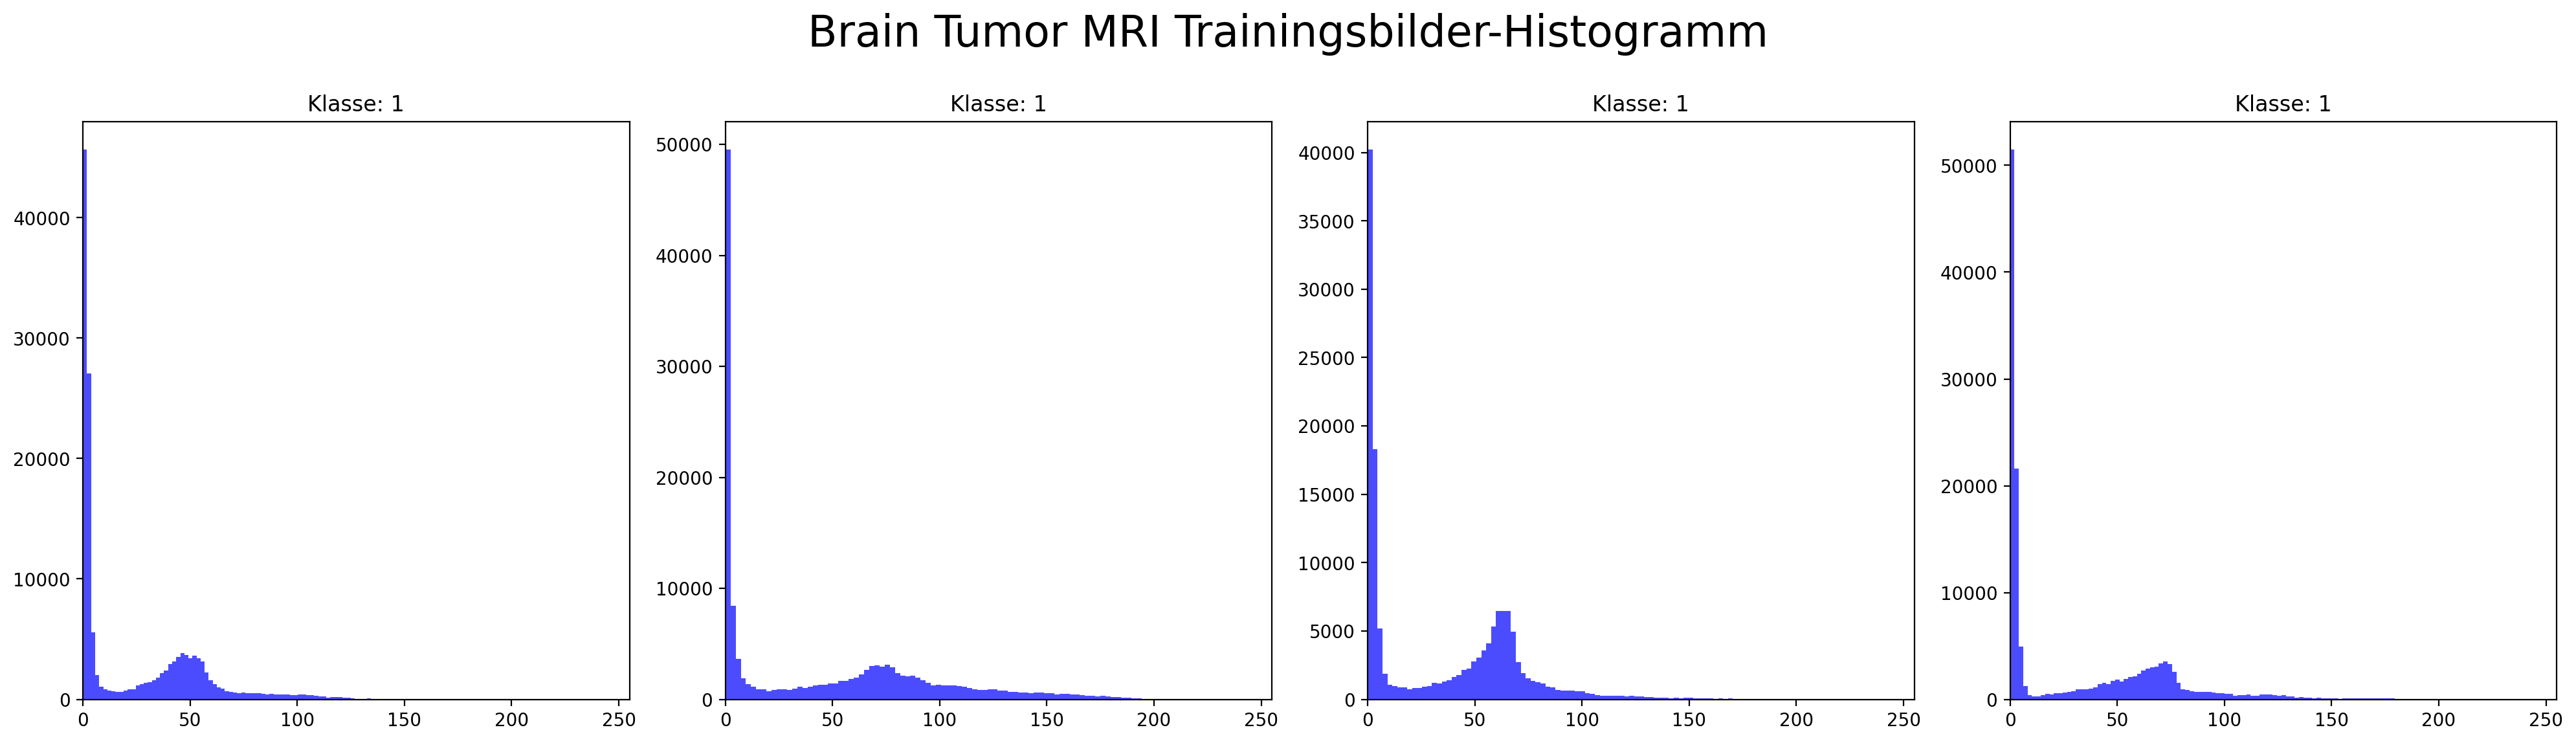

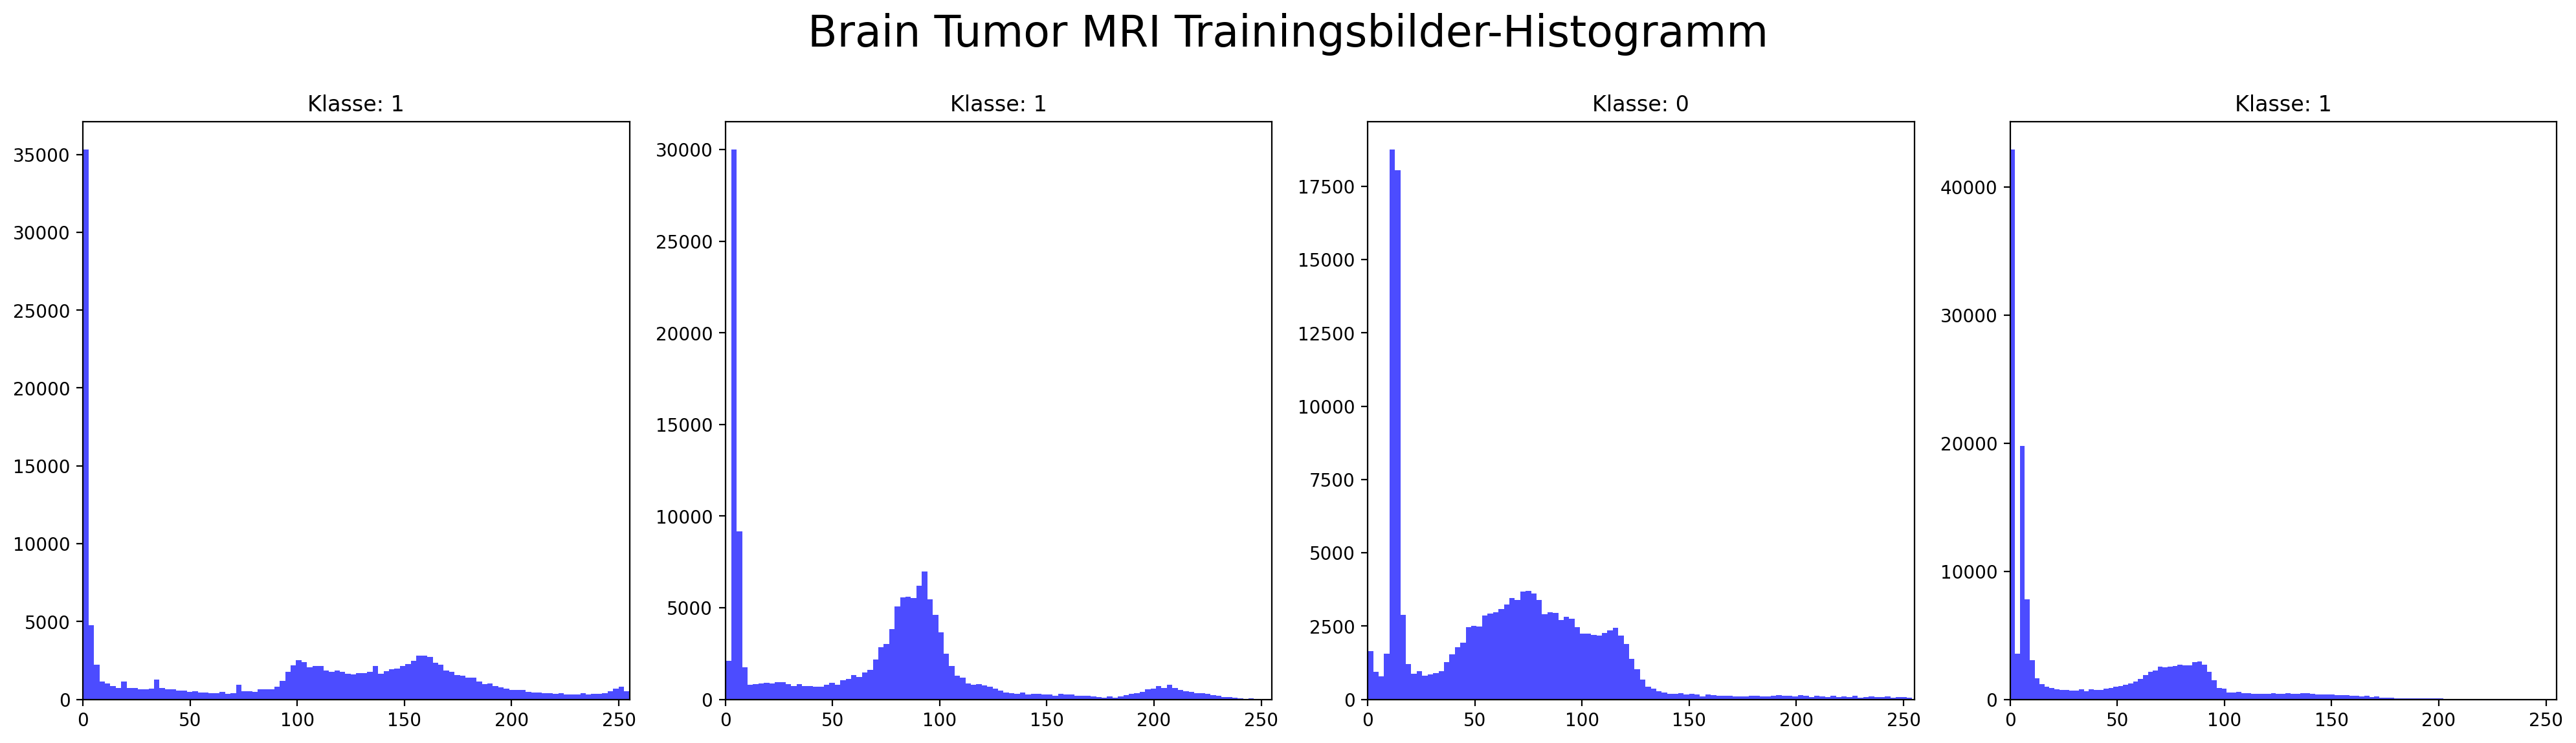

In [6]:
MRI_eda.show_batches(suptitle="Brain Tumor MRI Trainingsbilder", 
                     batch_idx=[0, 370],
                     hist_mode=True,
                     dataloader_type="train")

## Testbilder

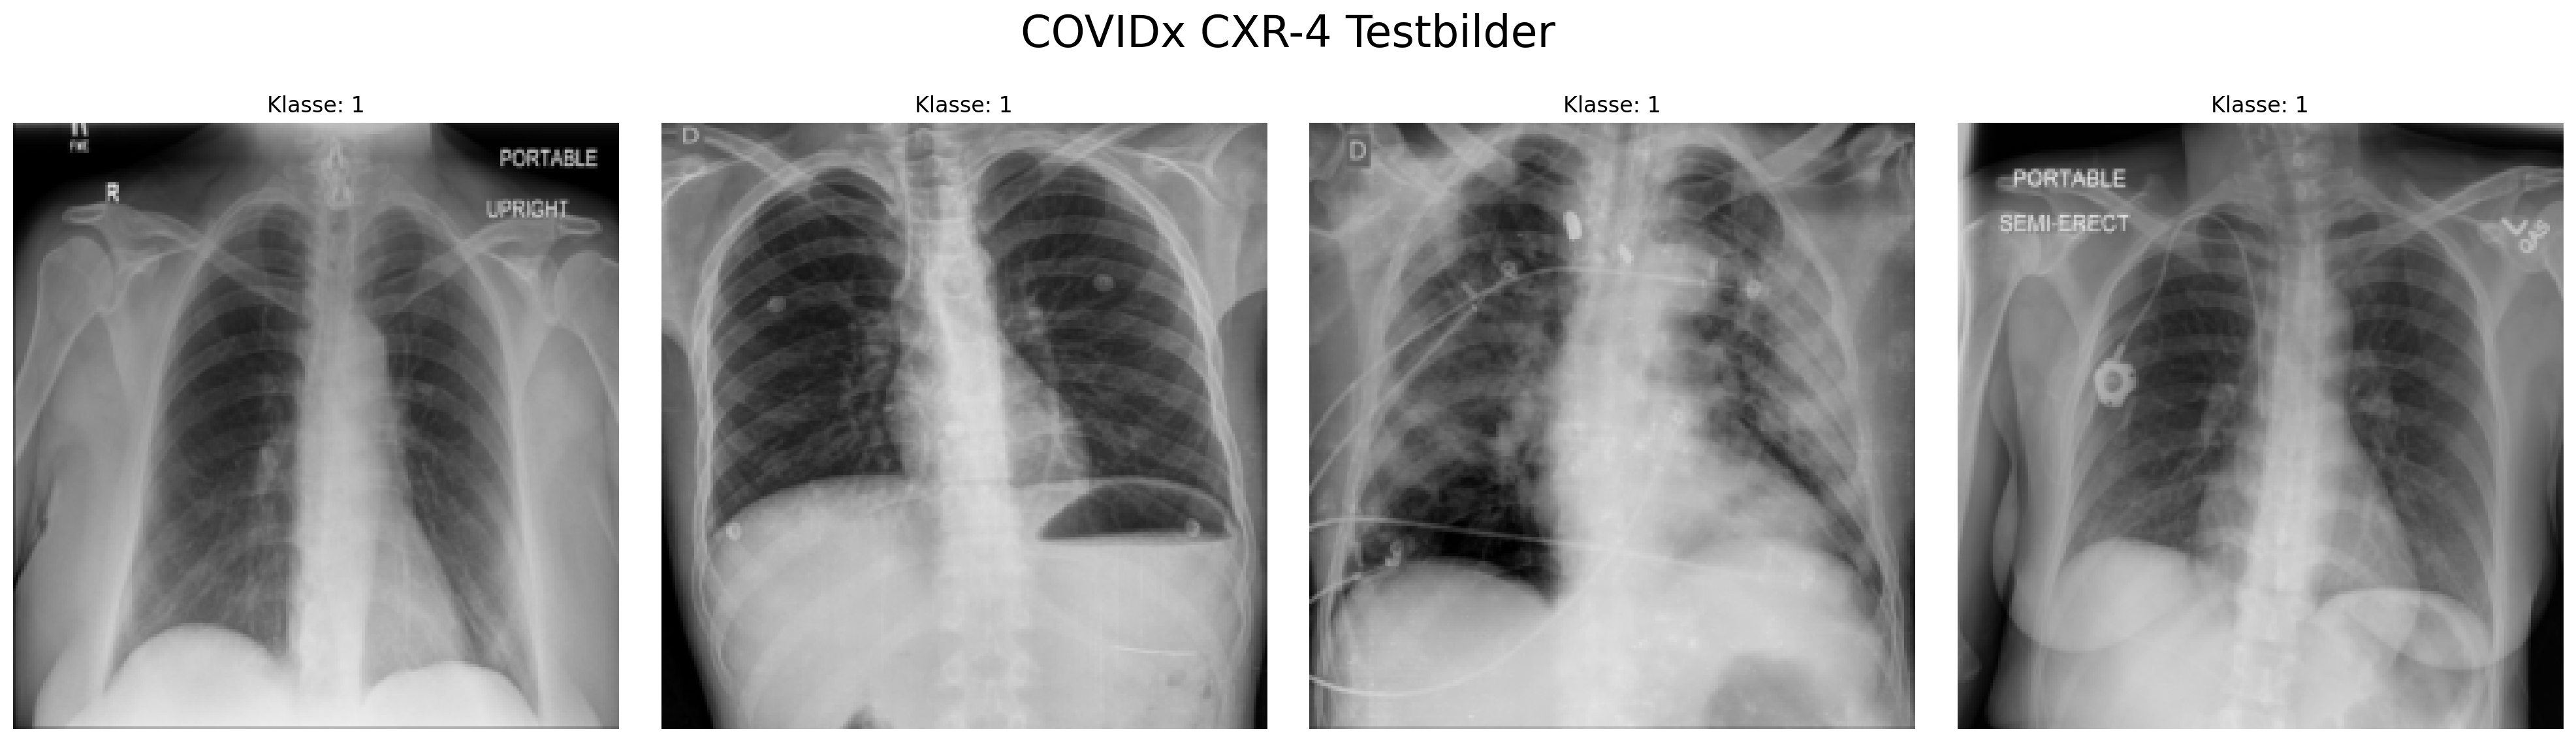

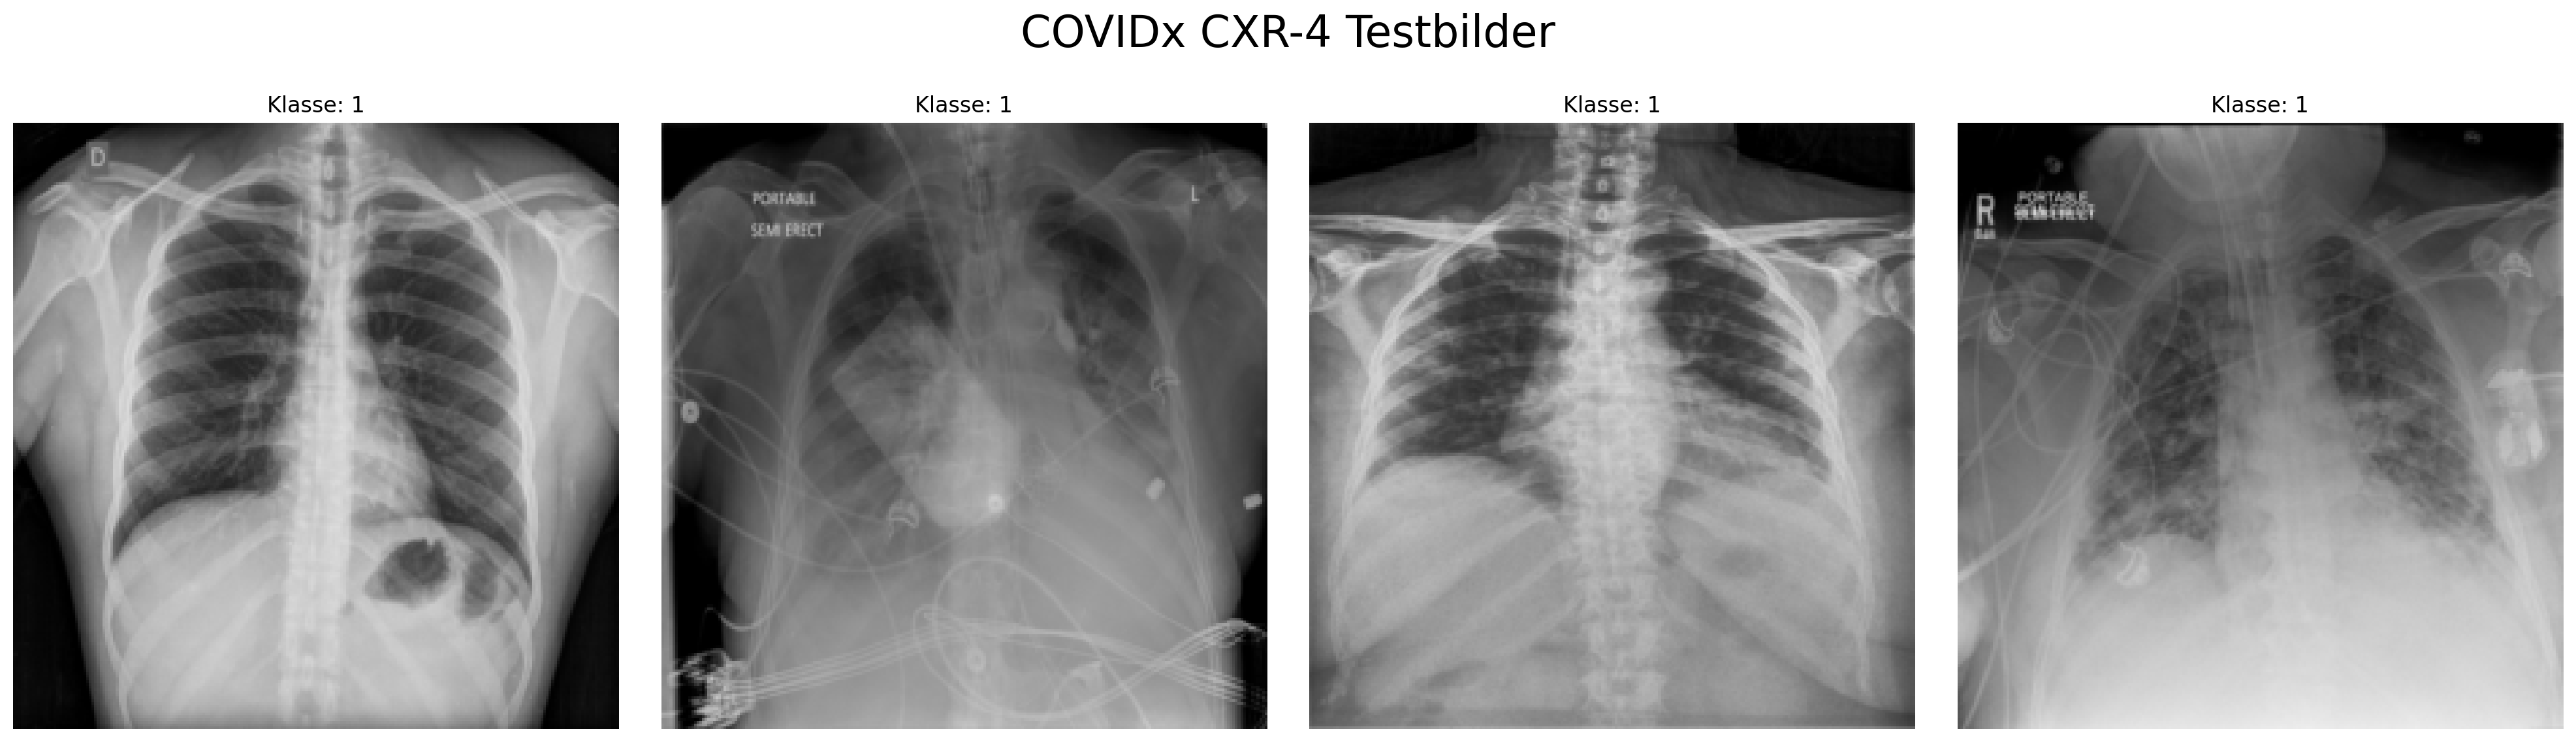

In [7]:
COVIDX_eda.show_batches(suptitle="COVIDx CXR-4 Testbilder", 
                        batch_idx=[1, 2],
                        hist_mode=False,
                        dataloader_type="test")


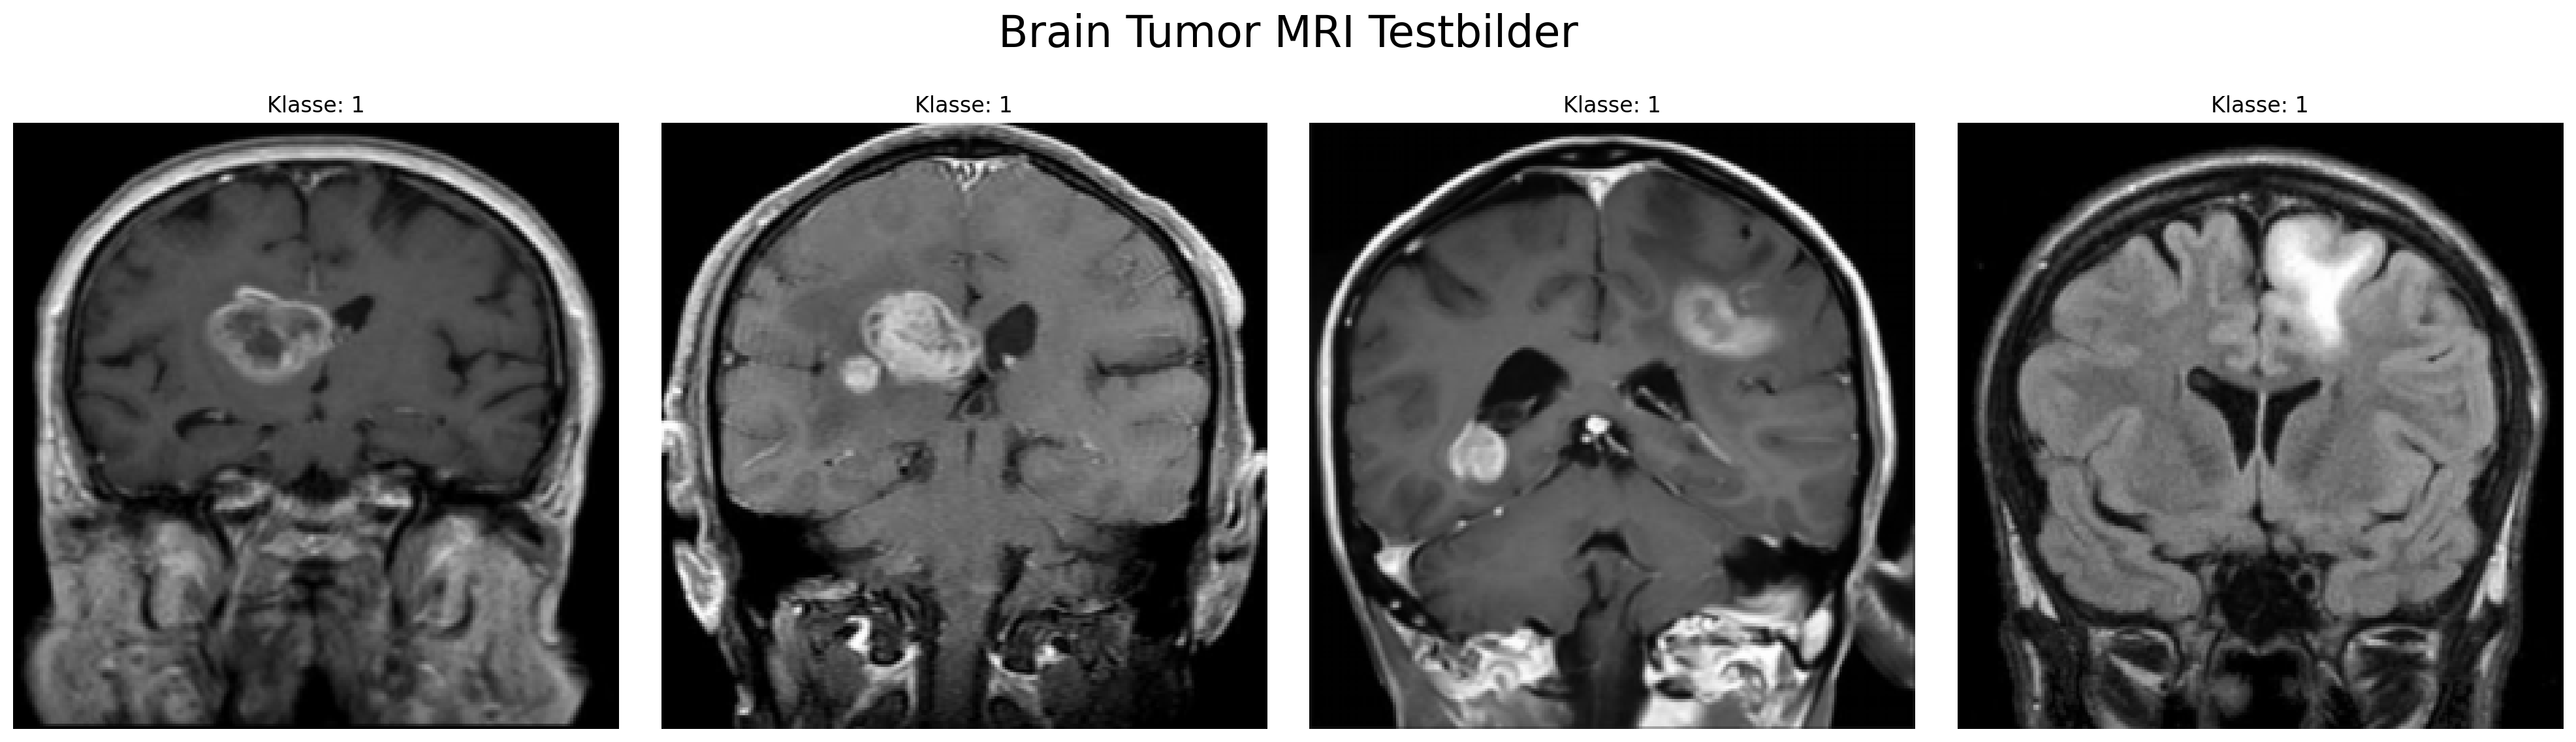

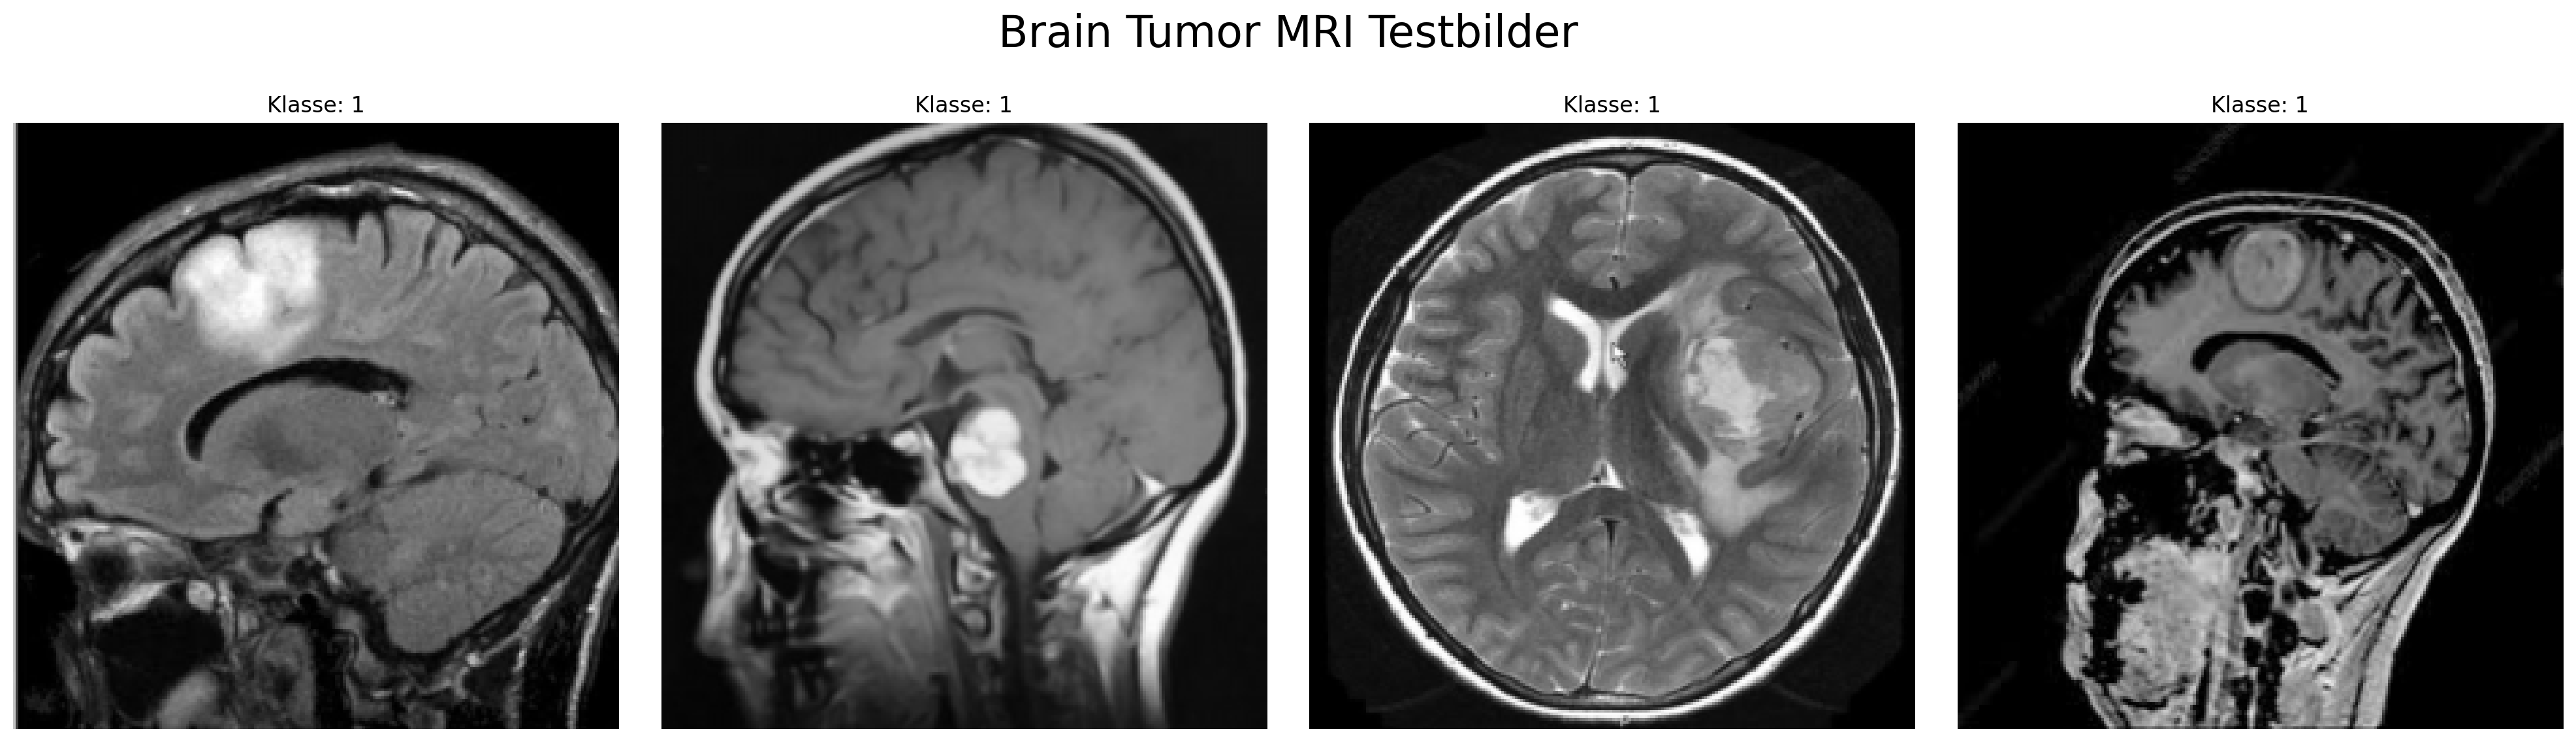

In [8]:
MRI_eda.show_batches(suptitle="Brain Tumor MRI Testbilder", 
                     batch_idx=[1, 2],
                     hist_mode=False,
                     dataloader_type="test")

### Distribution

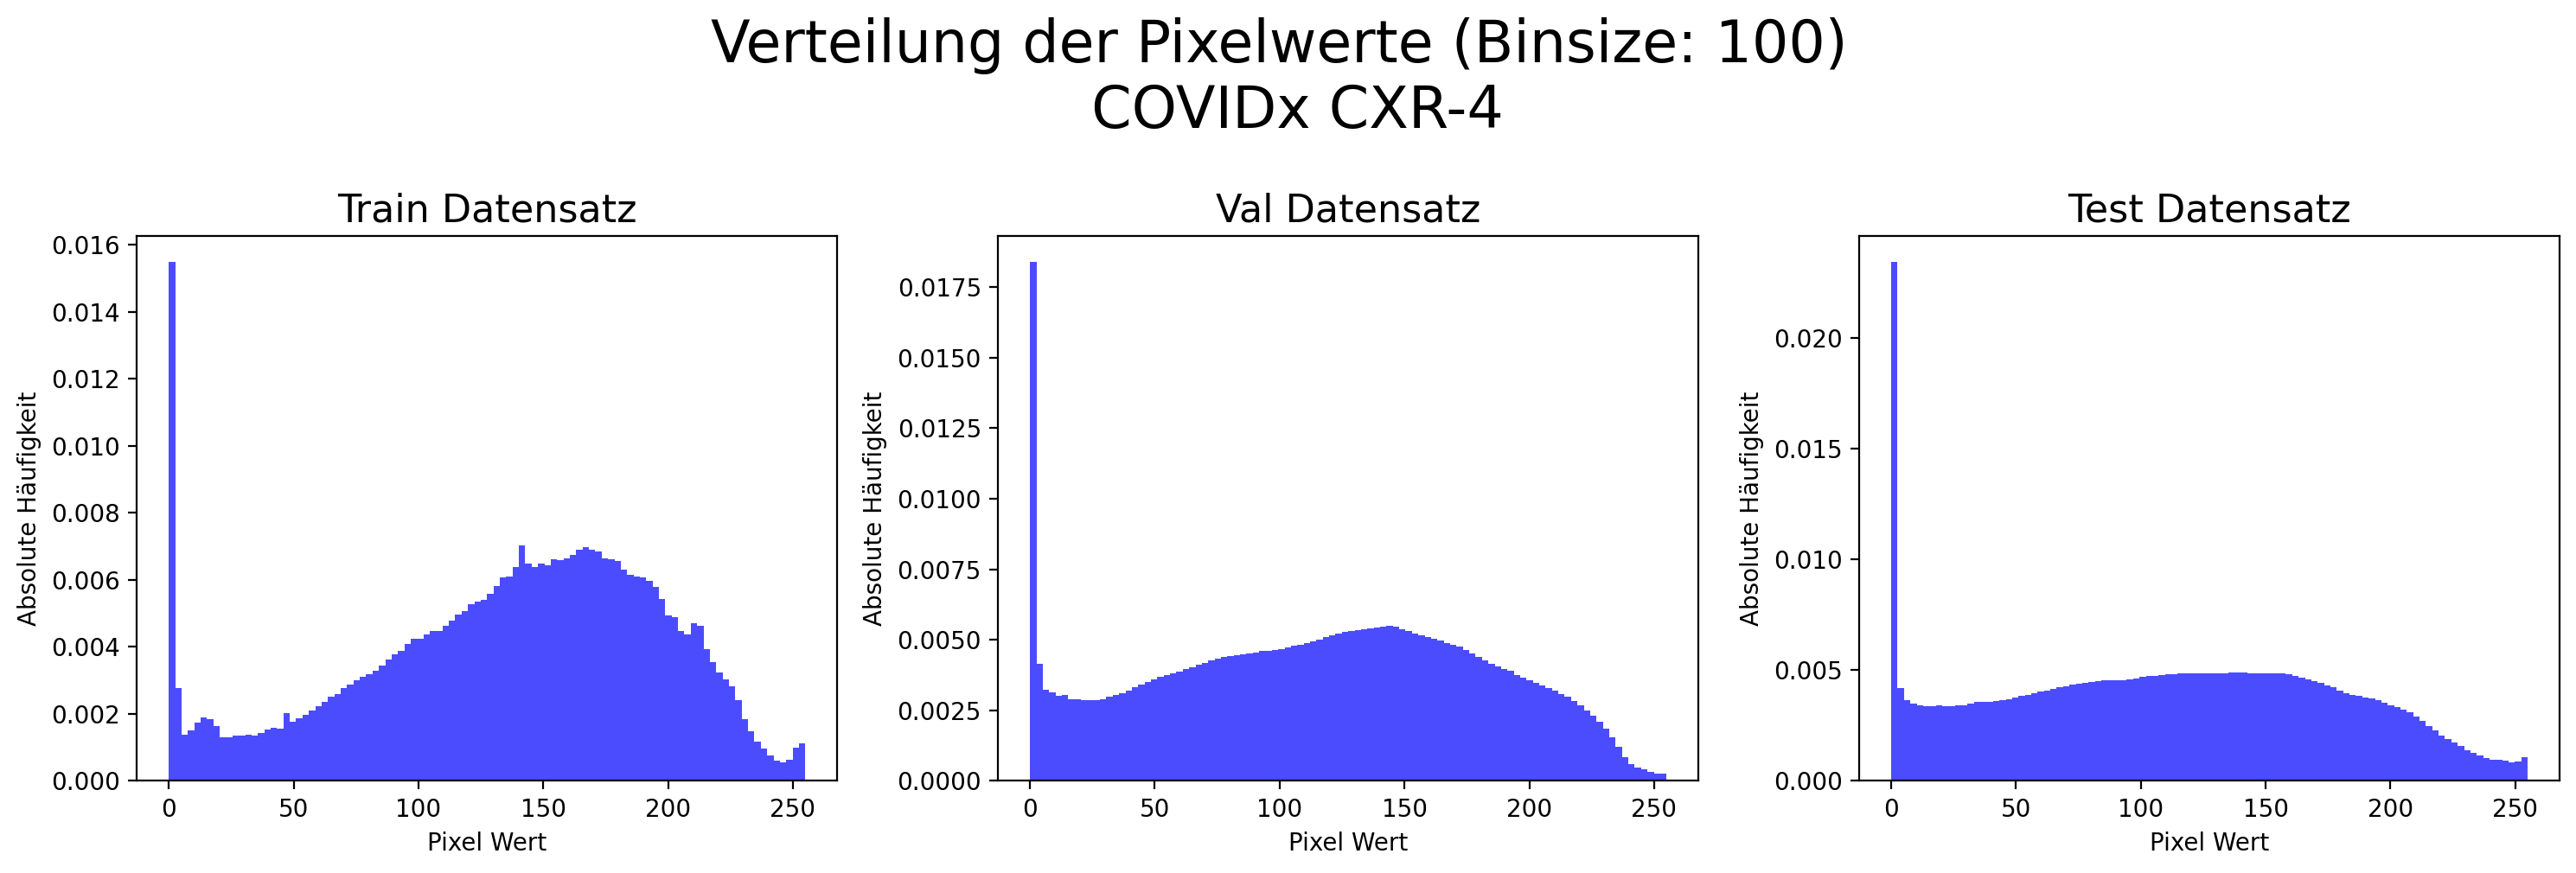

In [9]:
COVIDX_eda.channel_distribution(dataset="COVIDx CXR-4", binsize=100, density=True)

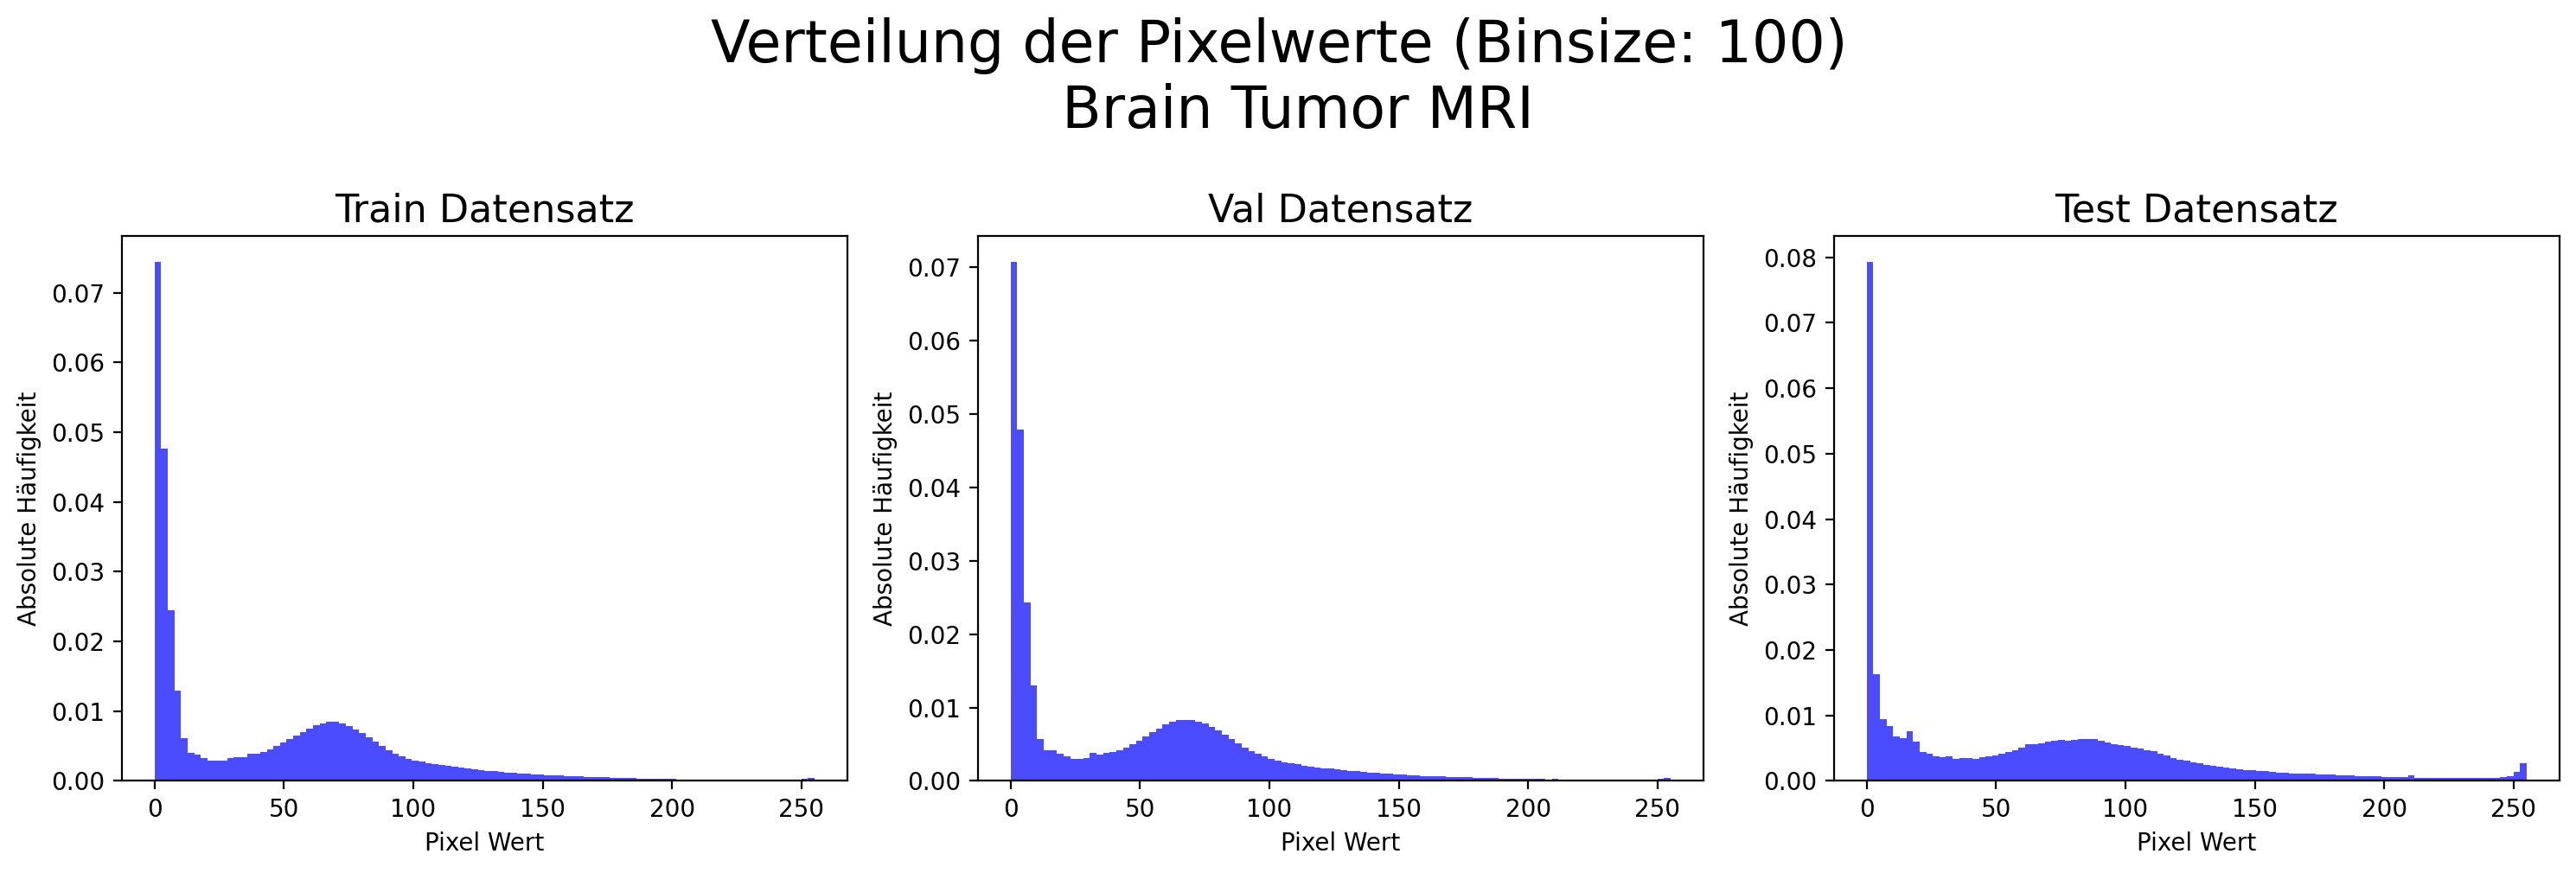

In [10]:
MRI_eda.channel_distribution(dataset="Brain Tumor MRI", binsize=100, density=True)